# Power regression

Let $\quad x \in \mathbb{R}^n\quad$ and $\quad y = b x ^ a\ ,\ \forall(a, b) \in \mathbb{R} \times \mathbb{R}^{*+}$

We have 
$$ y' = ln(y)\ =\ ln(b x ^ a) \ =\ ln(b) + ln(x^a) \ =\ a ln(x) + ln(b) \ =\ a' x' + b'$$
whit $\ a' = a\ ,\ b' = ln(b)\ ,\ x' = ln(x)$

So
$$y\ =\ e^{b'} x ^ a$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

correlation coefficient: R(x, y) = 0.8041822220346072


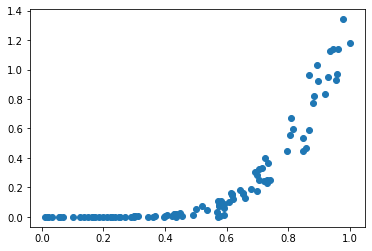

In [2]:
# Dataset
data = pd.read_csv("dataset/power.csv")
# y = b * x ^ a
X, y = data.X, data.y

# Plot the dataset
plt.scatter(X, y)

# Correlation coefficient
corrcoef = np.corrcoef(X, y)
print("correlation coefficient: R(x, y) =", corrcoef[0, 1])

correlation coefficient: R(x, y) = 0.9812608950864684


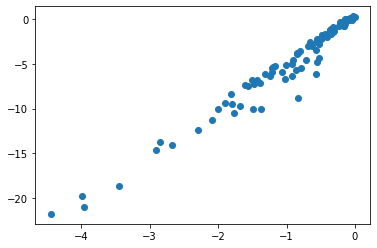

In [3]:
# Linearization of the data set
# y' = a' x' + b' | b' = ln(b), a' = a, x' = ln(x)
X, y = np.log(X), np.log(y)

# Plot the dataset
plt.scatter(X, y)

# Correlation coefficient
corrcoef = np.corrcoef(X, y)
print("correlation coefficient: R(x, y) =", corrcoef[0, 1])

a'  = 5.235204010131406
b' = 0.12153979113724603


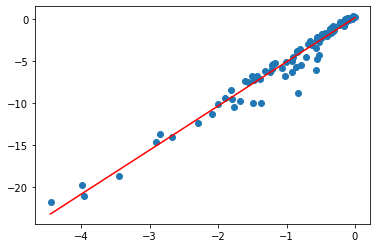

In [4]:
# Solve this linear problem

from scipy import optimize

def model(X, a, b):
    return a * X + b
    
[_a, _b], _ = optimize.curve_fit(model, X, y)
print("a'  =", _a)
print("b' =", _b)

# Plot the result
plt.scatter(X, y)
__x = np.linspace(X.min(), X.max(), X.shape[0])
# y' = a' x' + b'
_ = plt.plot(__x, _a * __x + _b, c='r')

a = 5.235204010131406
b = 1.129234298548148


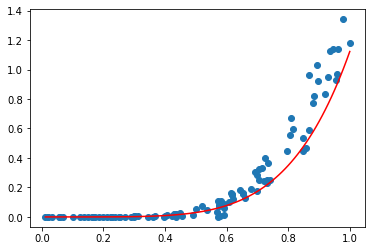

In [5]:
# Solve the nonlinear problem

# the original dataset
X, y = data.X, data.y

# b' = ln(b), a' = a  =>  b = exp(b'), a = a'
a = _a
b = np.exp(_b)
print("a =", a)
print("b =", b)

# Plot the result
plt.scatter(X, y)
__x = np.linspace(X.min(), X.max(), X.shape[0])
# y = b x ^ a
_ = plt.plot(__x, b * __x ** a, c='r')

## Solve this nonlinear problem with the gradient descent algorithm

### Dataset

We have $\quad x \in \mathbb{R}^n\ ; \quad y\ =\ b x ^ a$

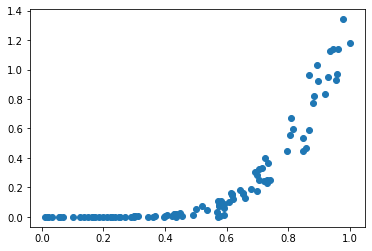

In [6]:
# Dataset
plt.scatter(X, y)

## model

Power function $\quad f(x)\ =\ b x ^ a$

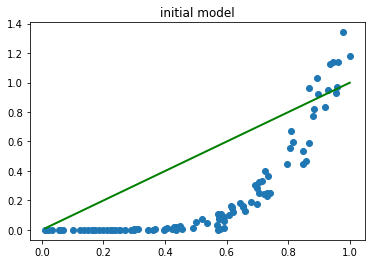

In [7]:
def model(X, a, b):
    """ This function returns the power model

    """
    return b * X ** a

# initial parameters
[a_0, b_0] = 1, 1

# initial model
init_model = model(X, a_0, b_0)

# plot initial model
plt.title("initial model")
plt.scatter(X, y)
fig_2 = plt.plot(X, init_model, c='g', linewidth=2)

### Cost function :

Residual sum of squares : $\quad J(a, b) = \frac{1}{2m} \sum_{i = 1}^{m} \left(b x_i ^ a - y_i\right)^2 $

In [8]:
def J(X, y, a, b):
    """ Returns the cost function for our model.

    """
    # Residual sum of squares
    rss = np.sum((model(X, a, b) - y) ** 2)

    # Number of rows times 2
    nb_rows_x2 = 2 * X.shape[0]

    return rss / nb_rows_x2

# show cost function for initial parameters
print(J(X, y, a_0, b_0))

0.06252052027101661


### Minimization algorithm :

Gradient descent algorithm $\quad \theta = \theta - \alpha \; \nabla J(\theta) $

a =  4.72170438426223
b =  1.3636766760760364


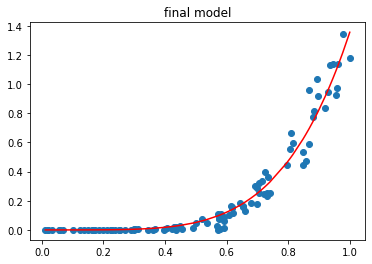

In [9]:
def gradient(X, y, a, b):
    """ Returns gradient of a function.

    """
    h = 1e-6
    derivative_a = (J(X, y, a + h, b) - J(X, y, a, b)) / h
    derivative_b = (J(X, y, a, b + h) - J(X, y, a, b)) / h
    return derivative_a, derivative_b


def gradient_descent(X, y, a, b, learn_rate, nb_iterations):
    """ Finding a local minimum of a differentiable function by gradient
    descent algorithm.

    """
    m = X.shape[0]
    for _i in range(nb_iterations):
        derivative_a, derivative_b = gradient(X, y, a, b)
        a -= learn_rate * derivative_a
        b -= learn_rate * derivative_b

    return a, b


# Training

# learning rate
learn_rate = 7

# number of iterations
number_iterations = 700

# final parameters for our model
a, b = gradient_descent(
    X, y, a_0, b_0, learn_rate, number_iterations)
print("a = ", a)
print("b = ", b)

# final model
final_model = model(X, a, b)

# plot final model
plt.title("final model")
plt.scatter(X, y)
fig_3 = plt.plot(X, final_model, c='r')

### With scipy library

a = 4.72185347417523
b = 1.3636983123916055


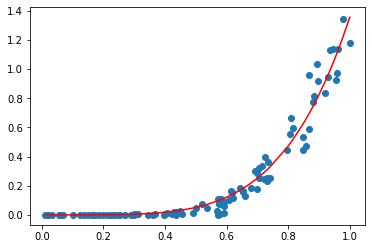

In [10]:
from scipy import optimize
    
[a, b], _ = optimize.curve_fit(model, X, y)
print("a =", a)
print("b =", b)

# plot result
plt.scatter(X, y)
plt.plot(X, model(X, a, b), c='r')